In [16]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN

%reload_ext autoreload
%autoreload 2
from utils import *

In [17]:
train = pickle.load(open("data/train.pickle", "rb"))
val = pickle.load(open("data/val.pickle", "rb"))

## Train-Test Split

In [18]:
train.head()

,tweet,target,lem
0,big night wcvb martha coakleycharlie baker de...,0,big night wcvb martha coakleycharlie baker deb...
1,not one bitch texting right now followers in...,0,not one bitch texting right now follower inch ...
2,going miss these bitches much far right she...,0,going miss these bitch much far right she rest...
3,hope shes larger than bird,0,hope shes larger than bird
4,all went through much shit together miss th...,0,all went through much shit together miss them ...


In [19]:
train.target.value_counts()

0    17518
1     1069
Name: target, dtype: int64

## Stop Word Removal


In [20]:
stop_words = set(stopwords.words('english'))
stop_list = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]
train.lem = train['lem'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_list]))
train.head()

,tweet,target,lem
0,big night wcvb martha coakleycharlie baker de...,0,big night wcvb martha coakleycharlie baker deb...
1,not one bitch texting right now followers in...,0,one bitch texting right follower inch rim inch...
2,going miss these bitches much far right she...,0,going miss bitch much far right resting girl b...
3,hope shes larger than bird,0,hope larger bird
4,all went through much shit together miss th...,0,went much shit together miss bitch


In [21]:
val.lem = val['lem'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_list]))
val.head()

,tweet,target,lem
0,got missed call from bitch,0,got missed call bitch
1,fucking with bad bitch you gone need some mon...,0,fucking bad bitch gone need money lil homie
2,lol credit aint where near good but know th...,0,lol credit aint near good know right man job n...
3,wipe the cum out them faggot contact lens wi...,0,wipe cum faggot contact lens wildin cant see shit
4,niggas cheat they bitch and dont expect pay ...,0,nigga cheat bitch expect pay back whatsoever y...


## Assign Feature and Target Variable

In [22]:
X_tr = train.lem
X_val = val.lem
y_tr = train.target
y_val = val.target

## TF-IDF Vectorizer 

In [23]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

## Multinomial Naive Bayes 

In [24]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_tr = nb.predict(tfidf_tr)
y_pr_nb_val = nb.predict(tfidf_val)
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score,precision_score,average_precision_score
t_rf_precision_train = precision_score(y_tr,y_pr_nb_tr)
print('Training Precision Score: {:.4}'.format(t_rf_precision_train))
average_precision = average_precision_score(y_tr,y_pr_nb_tr)
print('Training Average precision-recall score: {0:0.2f}'.format(average_precision))
f1 = f1_score(y_tr,y_pr_nb_tr)
print('Training F1 score: {0:0.2f}'.format(f1))
recall = recall_score(y_tr,y_pr_nb_tr)
print('Training Recall score: {0:0.2f}'.format(recall))

Training Precision Score: 0.875
Training Average precision-recall score: 0.06
Training F1 score: 0.01
Training Recall score: 0.01


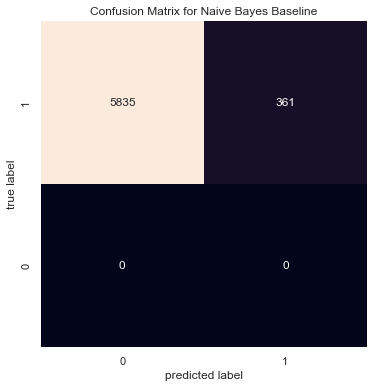

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val,y_pr_nb_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Naive Bayes Baseline')
plt.show()

## Random Forest Classifier

Training Precision Score: 0.875
Training Average precision-recall score: 0.06
Training F1 score: 0.01
Training Recall score: 0.01


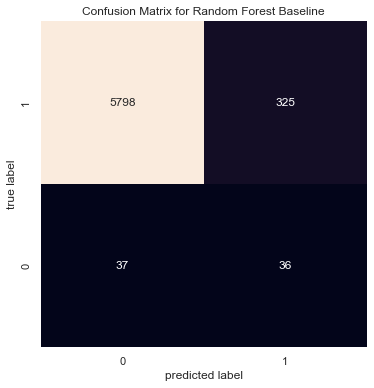

In [26]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pr_rf_tr = rf.predict(tfidf_tr)
y_pr_rf_val = rf.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr,y_pr_nb_tr)
print('Training Precision Score: {:.4}'.format(t_rf_precision_train))
average_precision = average_precision_score(y_tr,y_pr_nb_tr)
print('Training Average precision-recall score: {0:0.2f}'.format(average_precision))
f1 = f1_score(y_tr,y_pr_nb_tr)
print('Training F1 score: {0:0.2f}'.format(f1))
recall = recall_score(y_tr,y_pr_nb_tr)
print('Training Recall score: {0:0.2f}'.format(recall))
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val,y_pr_rf_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Random Forest Baseline')
plt.show()


## Decision Tree Classifier 

Training Precision Score: 0.875
Training Average precision-recall score: 0.06286636233427681
Training F1 score: 0.012999071494893223
Training Recall score: 0.006548175865294668


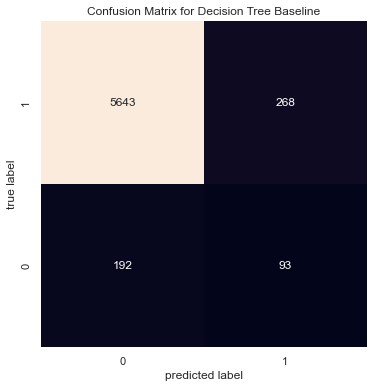

In [27]:
dt = DecisionTreeClassifier().fit(tfidf_tr, y_tr)
y_pr_dt_tr = dt.predict(tfidf_tr)
y_pr_dt_val = dt.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr,y_pr_nb_tr)
print('Training Precision Score:',t_rf_precision_train)
average_precision = average_precision_score(y_tr,y_pr_nb_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr,y_pr_nb_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr,y_pr_nb_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_dt_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Decision Tree Baseline')
plt.show()

## Logistic Regression

Training Precision Score: 0.875
Training Average precision-recall score: 0.06286636233427681
Training F1 score: 0.012999071494893223
Training Recall score: 0.15060804490177737


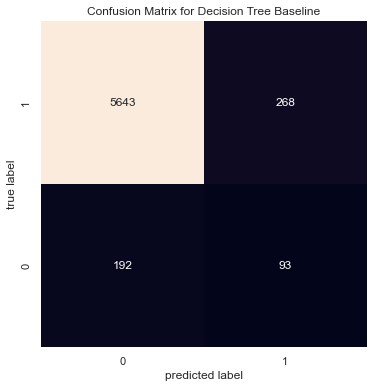

In [28]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pr_log_tr = log.predict(tfidf_tr)
y_pr_log_val = log.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr,y_pr_nb_tr)
print('Training Precision Score:',t_rf_precision_train)
average_precision = average_precision_score(y_tr,y_pr_nb_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr,y_pr_nb_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr,y_pr_log_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_dt_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Decision Tree Baseline')
plt.show()


# Undersampling Methods

In [29]:
# separate minority and majority classes
majority = train[train.target==0]
minority = train[train.target==1]

#baseline counts
counter = Counter(y_tr)
print("Baseline: ", counter)

Baseline:  Counter({0: 17518, 1: 1069})


## Random UnderSampler 

In [31]:
rus = RandomUnderSampler()
X_tr_rus, y_tr_rus = rus.fit_resample(tfidf_tr, y_tr)
counter_rus = Counter(y_tr_rus)
print("Random Undersampler: ", counter_rus)

Random Undersampler:  Counter({0: 1069, 1: 1069})


Training Precision Score: 0.9371534195933456
Training Average precision-recall score: 0.9146618966021072
Training F1 score: 0.9428172942817294
Training Recall score: 0.9485500467726847


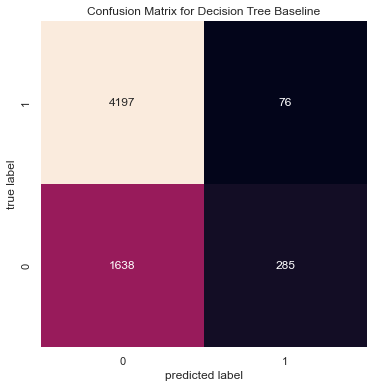

In [38]:
nb2 = MultinomialNB().fit(X_tr_rus, y_tr_rus)
y_pr_nb2_tr = nb2.predict(X_tr_rus)
y_pr_nb2_val = nb2.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr_rus,y_pr_nb2_tr)
print('Training Precision Score:',t_rf_precision_train)
average_precision = average_precision_score(y_tr_rus,y_pr_nb2_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr_rus,y_pr_nb2_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr_rus,y_pr_nb2_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_nb2_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Naive Bayes RandomUnderSampler')
plt.show()


Training Precision Score: 0.9981290926099158
Training Average precision-recall score: 0.997197139209336
Training F1 score: 0.9981290926099158
Training Recall score: 0.9981290926099158


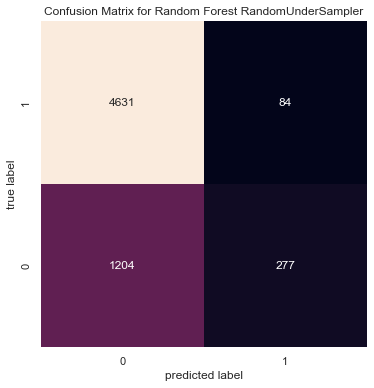

In [40]:
rf2 = RandomForestClassifier(n_estimators=100).fit(X_tr_rus, y_tr_rus)
y_pr_rf2_tr = rf2.predict(X_tr_rus)
y_pr_rf2_val = rf2.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr_rus,y_pr_rf2_tr)
print('Training Precision Score:',t_rf_precision_train)
average_precision = average_precision_score(y_tr_rus,y_pr_rf2_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr_rus,y_pr_rf2_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr_rus,y_pr_rf2_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_rf2_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Random Forest RandomUnderSampler')
plt.show()

Training Precision Score: 0.9326732673267327
Training Average precision-recall score: 0.8812705498800582
Training F1 score: 0.9062049062049062
Training Recall score: 0.8811973807296539


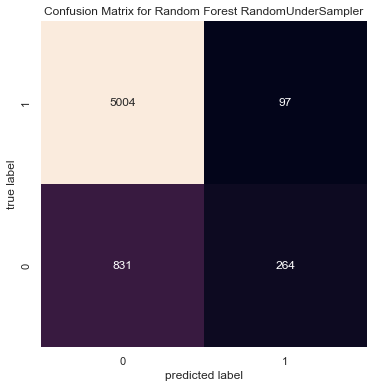

In [44]:
log2 = LogisticRegression().fit(X_tr_rus, y_tr_rus)
y_pr_log2_tr = log2.predict(X_tr_rus)
y_pr_log2_val = log2.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr_rus,y_pr_log2_tr)
print('Training Precision Score:',t_rf_precision_train)
average_precision = average_precision_score(y_tr_rus,y_pr_log2_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr_rus,y_pr_log2_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr_rus,y_pr_log2_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_log2_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Random Forest RandomUnderSampler')
plt.show()

## SMOTE-ENN

In [45]:
sme = SMOTEENN(sampling_strategy="minority")
X_tr_sme, y_tr_sme = sme.fit_resample(tfidf_tr, y_tr)
counter_sme = Counter(y_tr_sme)
print("SMOTE-ENN: ", counter_sme)

SMOTE-ENN:  Counter({1: 17443, 0: 16096})


Training Precision Score: 0.9275175706851226
Training Average precision-recall score: 0.9238970551192331
Training F1 score: 0.9582617371542598
Training Recall score: 0.9911139138909592


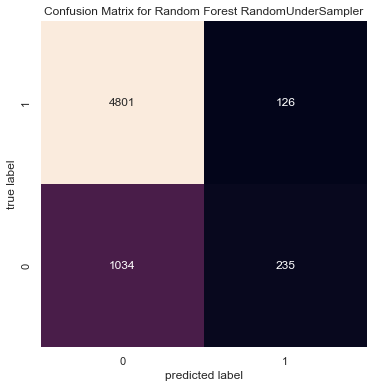

In [51]:
nb4 = MultinomialNB().fit(X_tr_sme, y_tr_sme)
y_pr_nb4_tr = nb4.predict(X_tr_sme)
y_pr_nb4_val = nb4.predict(tfidf_val)
t_rf_precision_train = precision_score(y_tr_sme,y_pr_nb4_tr)
print('Training Precision Score:',t_rf_precision_train)
average_precision = average_precision_score(y_tr_sme,y_pr_nb4_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr_sme,y_pr_nb4_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr_sme,y_pr_nb4_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_nb4_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Naive Bayes SMOTE-ENN')
plt.show()

Training Precision Score: 1.0
Training Average precision-recall score: 1.0
Training F1 score: 1.0
Training Recall score: 1.0


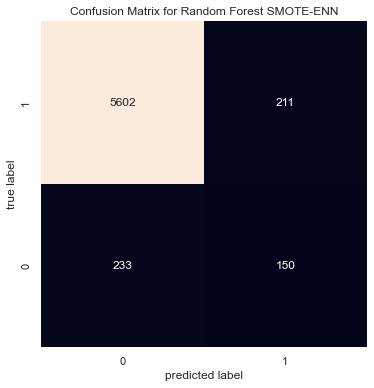

In [53]:
rf4 = RandomForestClassifier(n_estimators=100).fit(X_tr_sme, y_tr_sme)
y_pr_rf4_tr = rf4.predict(X_tr_sme)
y_pr_rf4_val = rf4.predict(tfidf_val)
precision_train = precision_score(y_tr_sme,y_pr_rf4_tr)
print('Training Precision Score:',precision_train)
average_precision = average_precision_score(y_tr_sme,y_pr_rf4_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr_sme,y_pr_rf4_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr_sme,y_pr_rf4_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_rf4_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Random Forest SMOTE-ENN')
plt.show()

Training Precision Score: 0.9275175706851226
Training Average precision-recall score: 0.9238970551192331
Training F1 score: 0.9582617371542598
Training Recall score: 0.9911139138909592


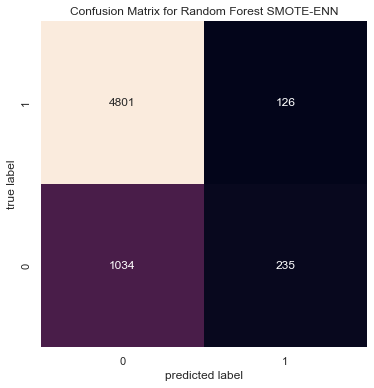

In [54]:
log4 = LogisticRegression().fit(X_tr_sme, y_tr_sme)
y_pr_log4_tr = nb4.predict(X_tr_sme)
y_pr_log4_val = nb4.predict(tfidf_val)
precision_train = precision_score(y_tr_sme,y_pr_log4_tr)
print('Training Precision Score:',precision_train)
average_precision = average_precision_score(y_tr_sme,y_pr_log4_tr)
print('Training Average precision-recall score:',average_precision)
f1 = f1_score(y_tr_sme,y_pr_log4_tr)
print('Training F1 score:', f1)
recall = recall_score(y_tr_sme,y_pr_log4_tr)
print('Training Recall score:',recall)
fig, ax = plt.subplots(figsize=(6,6))
mat = confusion_matrix(y_val, y_pr_log4_val)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['1', '0'])
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix for Random Forest SMOTE-ENN')
plt.show()

In [69]:
data = {'F1 Score': [f1_score(y_val, y_pr_nb_val), 
                     f1_score(y_val, y_pr_rf_val), 
                     f1_score(y_val, y_pr_dt_val), 
                     f1_score(y_val, y_pr_log_val), 
                     f1_score(y_val, y_pr_nb2_val), 
                     f1_score(y_val, y_pr_rf2_val), 
                     f1_score(y_val, y_pr_log2_val), 
               
                     f1_score(y_val, y_pr_rf4_val),                     
                     f1_score(y_val, y_pr_nb4_val),
                     f1_score(y_val, y_pr_log4_val)],
        
        'Recall': [recall_score(y_val, y_pr_nb_val), 
                   recall_score(y_val, y_pr_rf_val), 
                   recall_score(y_val, y_pr_dt_val), 
                   recall_score(y_val, y_pr_log_val), 
                   recall_score(y_val, y_pr_nb2_val), 
                   recall_score(y_val, y_pr_rf2_val), 
                   recall_score(y_val, y_pr_log2_val),
              
                   recall_score(y_val, y_pr_nb4_val),                   
                   recall_score(y_val, y_pr_rf4_val),
                   recall_score(y_val, y_pr_log4_val)],
        
        'Precision': [precision_score(y_val, y_pr_nb_val), 
                      precision_score(y_val, y_pr_rf_val), 
                      precision_score(y_val, y_pr_dt_val), 
                      precision_score(y_val, y_pr_log_val), 
                      precision_score(y_val, y_pr_nb2_val),
                      precision_score(y_val, y_pr_rf2_val), 
                      precision_score(y_val, y_pr_log2_val),
                    
                      precision_score(y_val, y_pr_nb4_val),
                      precision_score(y_val, y_pr_rf4_val),                                       
                      precision_score(y_val, y_pr_log4_val)]}

baseline = pd.DataFrame(data=data, index = ['Naive Bayes Baseline',
                                            'Random Forest Baseline', 
                                            'Decision Tree Baseline', 
                                            'Logistic Regression Baseline',
                                            'Naive Bayes RUS',
                                            'Random Forest RUS',  
                                            'Logistic Regression RUS', 
                                            
                                            'Naive Bayes SMOTE-ENN',
                                            'Random Forest SMOTE-ENN', 
                                            'Logistic Regression SMOTE-ENN'])

In [70]:
baseline

,F1 Score,Recall,Precision
Naive Bayes Baseline,0.000000,0.000000,0.000000
Random Forest Baseline,0.165899,0.099723,0.493151
Decision Tree Baseline,0.287926,0.257618,0.326316
Logistic Regression Baseline,0.177677,0.108033,0.500000
Naive Bayes RUS,0.249562,0.789474,0.148206
Random Forest RUS,0.300760,0.767313,0.187036
Logistic Regression RUS,0.362637,0.731302,0.241096
Naive Bayes SMOTE-ENN,0.403226,0.650970,0.185185
Random Forest SMOTE-ENN,0.288344,0.415512,0.391645
Logistic Regression SMOTE-ENN,0.288344,0.650970,0.185185


In [71]:
baseline.to_csv('data/baseline_df.csv')